<a href="https://colab.research.google.com/github/rhuancborges/praticas-programacaoMatematica/blob/main/problema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática 1 (AP1)
### GCC118 - Programação Matemática


**Nome**: Rhuan Campideli Borges (202210075)

**Turma**: 10A


# Enunciado - Problema 2

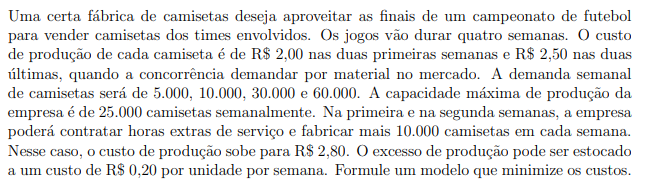

# Modelagem Matemática

## Dados
Para iniciar nossa modelagem, podemos retirar, do enunciado, alguns dados importantes:

*  $t \in T = \{1,2,3,4\}$ -> períodos (semanas) dos jogos;
*  $c_t$ -> custos de produção em cada semana;
*  $d_t$ -> demanda de camisetas em cada semana;
*  $c_P$ -> capacidade de produção;
*  $c_P'$ -> capacidade extra de produção com horas extras;
*  $c_E$ -> custo de estoque;
*  $c'$ -> custo de produção em horas extras.

**Vetor de custos de produção($c_t$)**:
$$
\mathbf{c_t} = \begin{pmatrix} 2 \\ 2 \\ 2.5 \\ 2.5 \end{pmatrix}
$$

\\

**Vetor de demandas($d_t$)**:
$$
\mathbf{d_t} = \begin{pmatrix} 5000 \\ 10000 \\ 30000 \\ 60000\end{pmatrix}
$$

\\

**Valor de capacidade máxima de produção semanal($c_P$)**:
$$
\mathbf{c_P} = 25000
$$

\\

**Valor máximo de capacidade extra de produção com horas extras($c_P'$)**:
$$
\mathbf{c_P'} = 10000
$$

\\

**Valor de custo de estoque($c_E$)**:
$$
\mathbf{c_E} = 0.20
$$

\\

**Valor de custo de produção com horas extras($c'$)**:
$$
\mathbf{c'} = 2.8
$$

\\

## Variáveis de decisão

As variáveis do problema consistem na quantidade de camisetas produzidas em cada semana, a quantidade de camisetas estocadas em cada semana e a quantidade de camisetas produzidas com horas extras nas semanas 1 e 2:

*  $x_t \in T=\{1,2,3,4\}$ -> quantidade de camisetas produzidas em cada semana;
*  $e_t \in T=\{1,2,3,4\}$ -> quantidade de camisetas estocadas em cada semana;
*  $y_{t'} \in T'=\{1,2\}$ -> quantidade de camisetas produzidas com horas extras.

### Tipo

As variáveis são contínuas, ou seja, $x \geq 0 $, $e \geq 0$, $y \geq 0$.

\\

## Objetivo e função

O objetivo do problema é minimizar os custos do produção e estocagem. Sendo assim, devemos **minimizar** a seguinte função:

$$
f(x,e,y) = \sum_{t=1}^{4} c_E*e_t + \sum_{t=1}^{4} c_t*x_t + \sum_{t'=1}^{2} c'*y_{t'} = \\ \sum_{t=1}^{4} 0.2*e_t + \sum_{t=1}^{4} c_t*x_t + \sum_{t'=1}^{2} 2.8*y_{t'}
$$

## Restrições

Agora, podemos formular equações e inequações de restrições para o problema.

\\

**Restrições a respeito do estoque**

* $e_0 = 0$ -> estoque inicial é zero;
* $e_t = e_{t-1} + x_t + y_{t} - d_t, \forall t \in \{1,2\}$ -> estoque para as duas primeiras semanas (considera a existência ou não de produção em horas extras);
* $e_t = e_{t-1} + x_t - d_t, \forall t \in \{3,4\}$ -> estoque para as duas ultimas semanas.

\\

**Restrições de capacidade de produção**

* $x_t \leq c_P → x_t \leq 25000, ∀ t \in \{1,2,3,4\}$ -> capacidade máxima de produção comum em todas as semanas
* $y_t \leq c_P' → y_t \leq 10000, ∀ t \in \{1,2\}$ -> capacidade máxima de produção em horas extras

# Instalando PuLP

In [21]:
!pip install pulp
import pulp

# Parâmetros

*  Períodos (semanas) dos jogos;
*  Custos de produção em cada semana;
*  Demanda de camisetas em cada semana;
*  Capacidade de produção em todas as semanas;
*  Capacidade extra de produção com horas extras;
*  Custo de estoque por camiseta em todas as semanas;
*  Custo de produção em horas extras;

In [22]:
periodos = [1,2,3,4]

custos_producao = {
    1: 2,
    2: 2,
    3: 2.5,
    4: 2.5
}

demanda = {
    1: 5000,
    2: 10000,
    3: 30000,
    4: 60000
}

capacidade_producao = 25000

capacidade_extra = 10000

custo_estoque = 0.2

custo_extra = 2.8

# Declaração do objeto do modelo matemático

In [23]:
modelo = pulp.LpProblem("camisetas", pulp.LpMinimize)

# Variáveis de decisão

* $x_1 \ge 0, x_2 \ge 0, ..., x_4 \ge 0$: quantidade de camisetas produzidas a cada semana
* $e_1 \ge 0, e_2 \ge 0, ..., e_4 \ge 0$: quantidade de camisetas estocadas a cada semana
* $y_1 \ge 0, y_2 \ge 0$: quantidade de camisetas produzidas em horas extras nas duas primeiras semanas

In [24]:
x_var = pulp.LpVariable.dicts("x", periodos, lowBound=0)
e_var = pulp.LpVariable.dicts("e", [0]+periodos, lowBound=0)
y_var = pulp.LpVariable.dicts("y", [1,2], lowBound=0)

# Função Objetivo

Minimizar $ f(x,e,y) = \sum_{t=1}^{4} 0.2*e_t + \sum_{t=1}^{4} c_t*x_t + \sum_{t'=1}^{2} 2.8*y_{t'}$


In [33]:
modelo += pulp.lpSum([custo_estoque*e_var[t]] for t in periodos) + pulp.lpSum([custos_producao[t]*x_var[t]] for t in periodos) + pulp.lpSum([custo_extra*y_var[t]] for t in [1,2])

/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1650: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


# Restrições

**Restrições a respeito do estoque**

* $e_0 = 0$;
* $e_t = e_{t-1} + x_t + y_{t} - d_t, \forall t \in \{1,2\}$;
* $e_t = e_{t-1} + x_t - d_t, \forall t \in \{3,4\}$.


In [26]:
modelo += e_var[0] == 0
for t in periodos:
  if t<3:
    modelo += e_var[t-1] + x_var[t] + y_var[t] - demanda[t] == e_var[t]
  else:
    modelo += e_var[t-1] + x_var[t] - demanda[t] == e_var[t]

**Restrições de capacidade de produção**

* $x_t \leq 25000, ∀ t \in \{1,2,3,4\}$;
* $y_t \leq 10000, ∀ t \in \{1,2\}$.

In [32]:
for t in periodos:
  modelo += x_var[t] <= capacidade_producao
  if t<3:
    modelo += y_var[t] <= capacidade_extra

# Resolvendo o problema

In [34]:
status = modelo.solve()

# Imprimindo a solução do problema

In [35]:
print("Status: ", pulp.LpStatus[status])
print("Função Objetivo: ", modelo.objective.value())
print("Soluções")
for t in periodos:
  if t<3:
    print(f"\tCamisetas produzidas na {t}ª semana -> Quantidade: {x_var[t].value()+y_var[t].value()}")
  else:
     print(f"\tCamisetas produzidas na {t}ª semana -> Quantidade: {x_var[t].value()}")
  print(f"\t\tCamisetas estocadas na {t}ª semana -> Quantidade: {e_var[t].value()}")

Status:  Optimal
Função Objetivo:  258000.0
Soluções
	Camisetas produzidas na 1ª semana -> Quantidade: 25000.0
		Camisetas estocadas na 1ª semana -> Quantidade: 20000.0
	Camisetas produzidas na 2ª semana -> Quantidade: 30000.0
		Camisetas estocadas na 2ª semana -> Quantidade: 40000.0
	Camisetas produzidas na 3ª semana -> Quantidade: 25000.0
		Camisetas estocadas na 3ª semana -> Quantidade: 35000.0
	Camisetas produzidas na 4ª semana -> Quantidade: 25000.0
		Camisetas estocadas na 4ª semana -> Quantidade: 0.0
